In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [2]:
df=pd.read_csv(r"C:\Users\maqpr\Downloads\data.csv")

In [3]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [4]:
df.shape

(3390, 17)

In [5]:
df.size

57630

In [6]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
df.sample(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2363,2363,42,1.0,F,YES,20.0,0.0,0,0,0,248.0,106.0,70.0,20.77,68.0,NaN,0
3166,3166,43,1.0,M,YES,15.0,0.0,0,0,0,175.0,125.0,76.0,24.92,80.0,95.0,0
1398,1398,39,2.0,M,YES,20.0,0.0,0,0,0,188.0,120.0,74.0,26.48,65.0,80.0,0
745,745,41,1.0,M,YES,20.0,0.0,0,0,0,238.0,128.0,86.0,26.09,80.0,72.0,0
369,369,51,1.0,F,NO,0.0,0.0,0,0,0,197.0,126.0,86.0,24.16,75.0,NaN,0
940,940,58,2.0,M,YES,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0
2193,2193,40,3.0,F,YES,20.0,0.0,0,0,0,247.0,125.0,83.0,22.55,85.0,80.0,0
2796,2796,58,1.0,M,YES,15.0,0.0,0,0,0,264.0,156.0,86.0,26.05,92.0,103.0,1
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3131,3131,51,2.0,F,NO,0.0,0.0,0,0,0,234.0,114.0,85.0,28.68,72.0,84.0,0


In [8]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [10]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
#there are no duplicate values in our data
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [13]:
#missing values
df.isnull().sum().sum()

510

In [14]:
#there are 510 missing values in our data

In [15]:
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())

In [16]:
col=['id','education','BPMeds','totChol','prevalentStroke','prevalentHyp','cigsPerDay','heartRate']
df.drop(col, axis=1, inplace=True)

In [17]:
df

,age,sex,is_smoking,diabetes,sysBP,diaBP,BMI,glucose,TenYearCHD
0,64,F,YES,0,148.0,85.0,NaN,80.0,1
1,36,M,NO,0,168.0,98.0,29.77,75.0,0
2,46,F,YES,0,116.0,71.0,20.35,94.0,0
3,50,M,YES,0,158.0,88.0,28.26,94.0,1
4,64,F,YES,0,136.5,85.0,26.42,77.0,0
...,...,...,...,...,...,...,...,...,...
3385,60,F,NO,0,123.5,79.0,29.28,103.0,0
3386,46,F,NO,0,102.0,56.0,21.96,84.0,0
3387,44,M,YES,0,164.0,119.0,28.92,72.0,1
3388,60,M,NO,0,167.0,105.0,23.01,85.0,0


In [18]:
df.isnull().sum()

age             0
sex             0
is_smoking      0
diabetes        0
sysBP           0
diaBP           0
BMI            14
glucose       304
TenYearCHD      0
dtype: int64

In [19]:
numerical_columns=['sysBP','diaBP','BMI','glucose']

In [20]:
# Calculate the interquartile range (IQR) for each numerical column and determine potential outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if len(outliers) > 0:
        print(f"Outliers in {column}:")
        print(outliers)

Outliers in sysBP:
      age sex is_smoking  diabetes  sysBP  diaBP    BMI  glucose  TenYearCHD
6      61   M         NO         0  232.0  136.0  24.83     79.0           0
10     61   F         NO         0  185.0  121.0  35.22      NaN           0
37     63   F         NO         0  186.5   97.0  30.47     96.0           0
71     63   M         NO         0  193.0  104.0  23.08     73.0           0
163    67   F         NO         0  192.0  102.0  44.09     62.0           0
...   ...  ..        ...       ...    ...    ...    ...      ...         ...
3291   66   M         NO         0  213.0  133.0  25.29     67.0           0
3293   54   F         NO         0  210.0  127.5  31.98     79.0           0
3296   57   F        YES         0  207.5  118.0  38.61     83.0           1
3308   60   F         NO         0  197.5  105.0  36.29     95.0           1
3367   59   M        YES         0  187.0   97.0  26.00     69.0           0

[105 rows x 9 columns]
Outliers in diaBP:
      age sex 

In [21]:
outliers

,age,sex,is_smoking,diabetes,sysBP,diaBP,BMI,glucose,TenYearCHD
15,51,M,YES,0,146.0,89.0,24.49,132.0,1
77,63,F,NO,1,152.0,88.0,36.54,170.0,0
107,45,M,NO,1,132.0,78.0,28.40,177.0,0
115,52,F,YES,0,127.5,72.5,24.29,118.0,0
130,63,M,NO,1,109.0,75.0,38.42,120.0,0
...,...,...,...,...,...,...,...,...,...
3252,48,M,YES,0,117.5,92.0,27.75,115.0,0
3260,43,F,NO,1,155.5,99.5,34.95,274.0,1
3316,46,F,NO,0,131.5,78.5,21.02,112.0,0
3373,58,F,NO,1,85.5,51.0,20.76,206.0,1


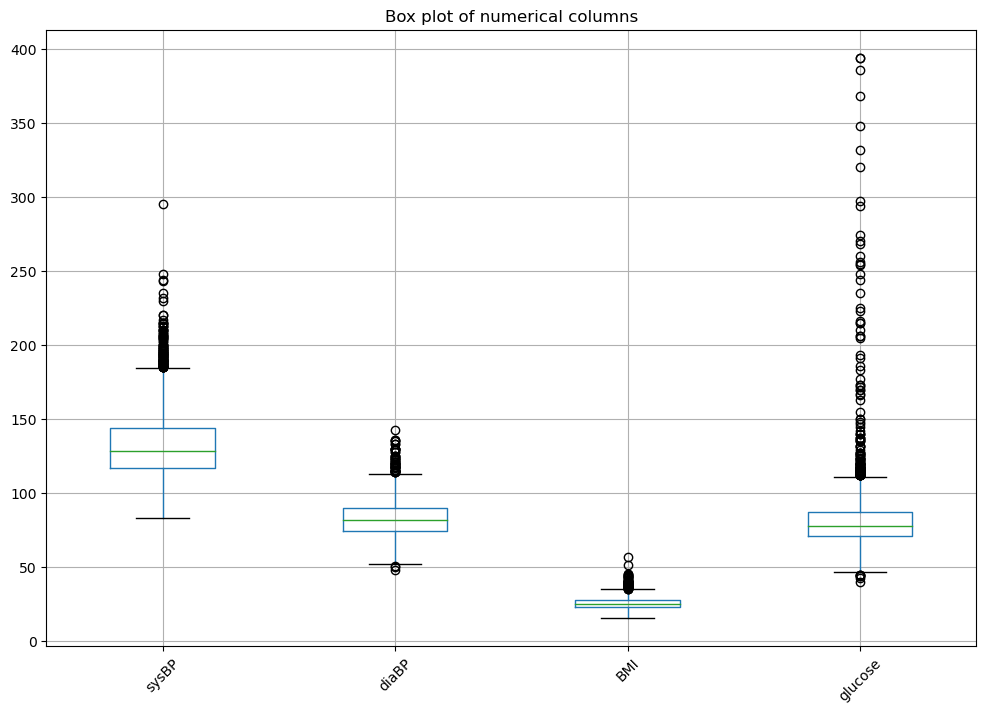

In [22]:
# Use box plots to visualize potential outliers
plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot()
plt.title('Box plot of numerical columns')
plt.xticks(rotation=45)
plt.show()

In [23]:
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [24]:
df.isnull().sum()

age             0
sex             0
is_smoking      0
diabetes        0
sysBP           0
diaBP           0
BMI             0
glucose       304
TenYearCHD      0
dtype: int64

In [25]:

df['glucose'].fillna(df['glucose'].mean(), inplace=True)

In [26]:
df.isnull().sum()

age           0
sex           0
is_smoking    0
diabetes      0
sysBP         0
diaBP         0
BMI           0
glucose       0
TenYearCHD    0
dtype: int64

In [27]:
df1=df

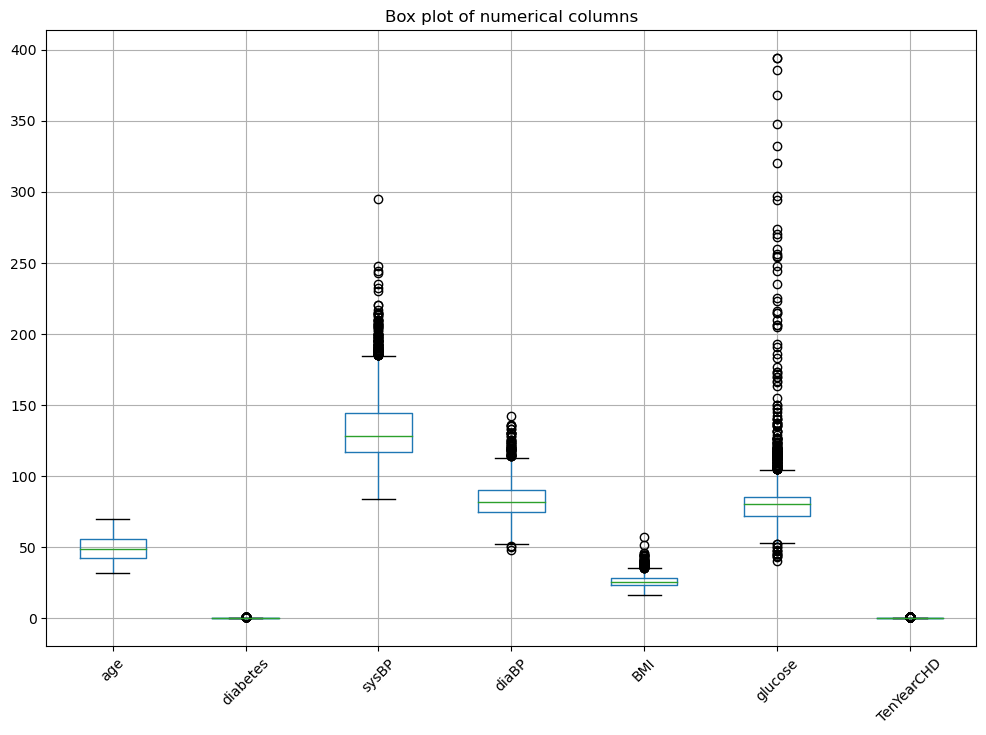

In [28]:
# Use box plots to visualize potential outliers
plt.figure(figsize=(12, 8))
df1.boxplot()
plt.title('Box plot of numerical columns')
plt.xticks(rotation=45)
plt.show()

In [29]:
df1

,age,sex,is_smoking,diabetes,sysBP,diaBP,BMI,glucose,TenYearCHD
0,64,F,YES,0,148.0,85.0,25.794964,80.0,1
1,36,M,NO,0,168.0,98.0,29.770000,75.0,0
2,46,F,YES,0,116.0,71.0,20.350000,94.0,0
3,50,M,YES,0,158.0,88.0,28.260000,94.0,1
4,64,F,YES,0,136.5,85.0,26.420000,77.0,0
...,...,...,...,...,...,...,...,...,...
3385,60,F,NO,0,123.5,79.0,29.280000,103.0,0
3386,46,F,NO,0,102.0,56.0,21.960000,84.0,0
3387,44,M,YES,0,164.0,119.0,28.920000,72.0,1
3388,60,M,NO,0,167.0,105.0,23.010000,85.0,0


In [30]:
# One-hot encode 'sex' column and handle dummy variable trap
sex_dummies = pd.get_dummies(df1['sex'], drop_first=True, prefix='is')

# One-hot encode 'is_smoking' column and handle dummy variable trap
smoking_dummies = pd.get_dummies(df1['is_smoking'], drop_first=True, prefix='is_smoking')

# Concatenate the dummy variables with the original DataFrame and drop the original columns
df1 = pd.concat([df1, sex_dummies, smoking_dummies], axis=1)
df1.drop(['sex', 'is_smoking'], axis=1, inplace=True)


In [31]:
df1

,age,diabetes,sysBP,diaBP,BMI,glucose,TenYearCHD,is_M,is_smoking_YES
0,64,0,148.0,85.0,25.794964,80.0,1,0,1
1,36,0,168.0,98.0,29.770000,75.0,0,1,0
2,46,0,116.0,71.0,20.350000,94.0,0,0,1
3,50,0,158.0,88.0,28.260000,94.0,1,1,1
4,64,0,136.5,85.0,26.420000,77.0,0,0,1
...,...,...,...,...,...,...,...,...,...
3385,60,0,123.5,79.0,29.280000,103.0,0,0,0
3386,46,0,102.0,56.0,21.960000,84.0,0,0,0
3387,44,0,164.0,119.0,28.920000,72.0,1,1,1
3388,60,0,167.0,105.0,23.010000,85.0,0,1,0


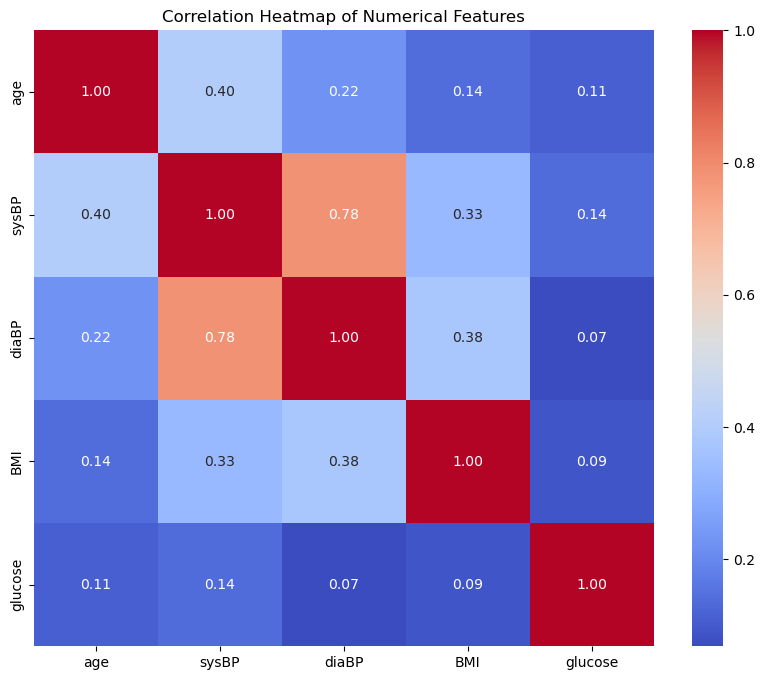

In [32]:
# Create a heatmap to visualize the correlation between numerical features
numerical_columns = ['age', 'sysBP', 'diaBP', 'BMI', 'glucose']
# Subset the DataFrame with only the numerical columns
numerical_df = df1[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

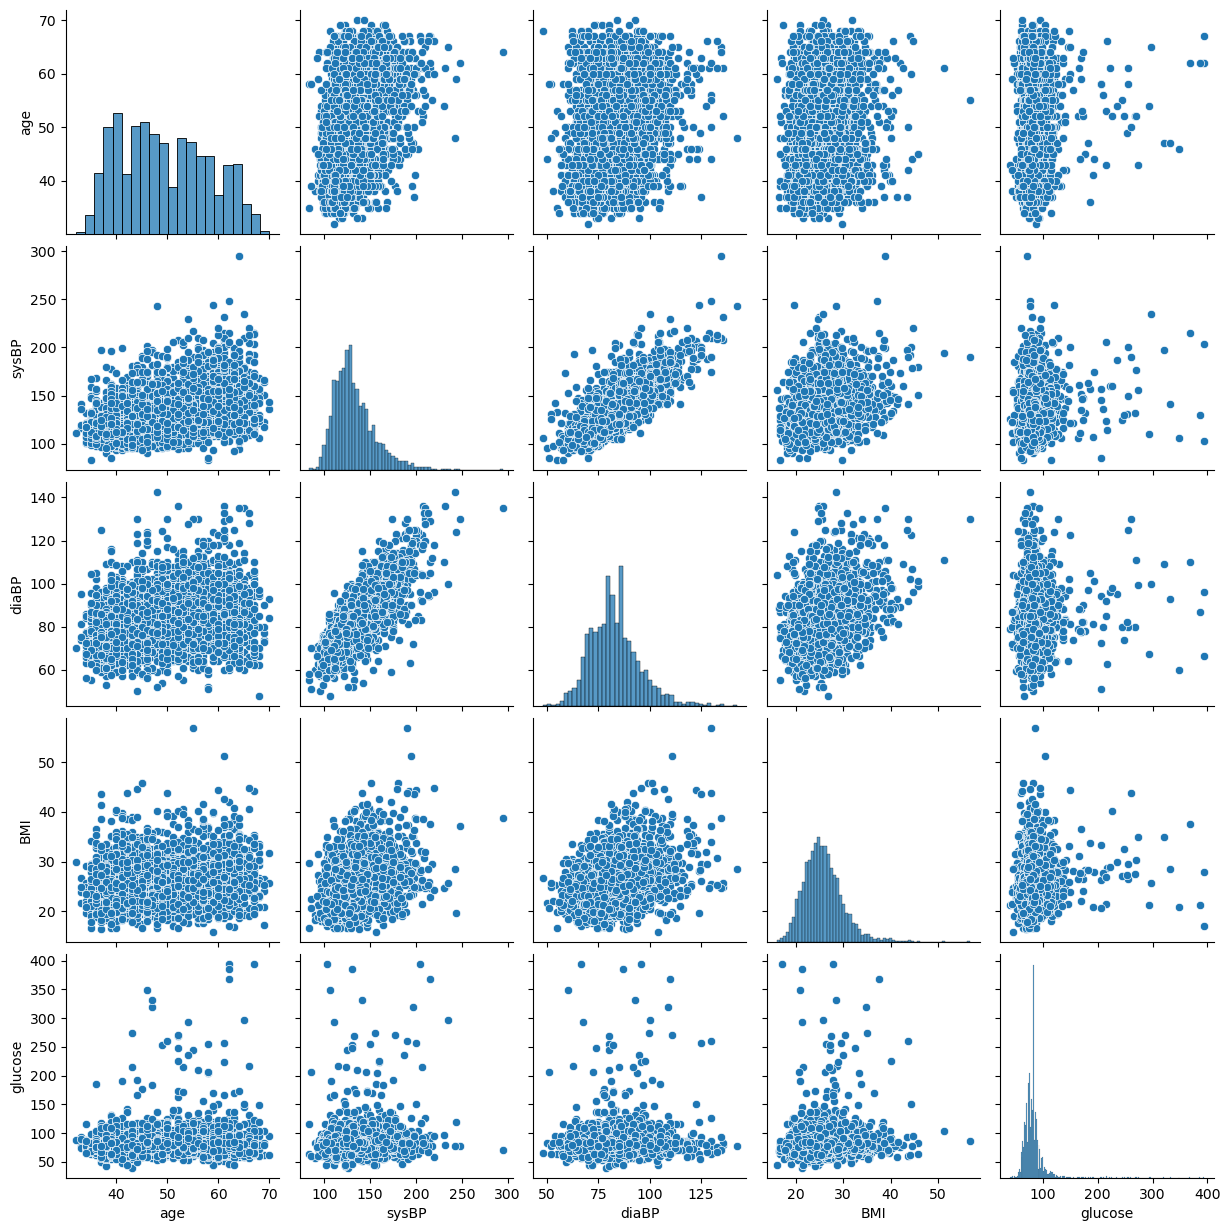

In [33]:
# Create scatter plots for numerical features
sns.pairplot(numerical_df)
plt.show()

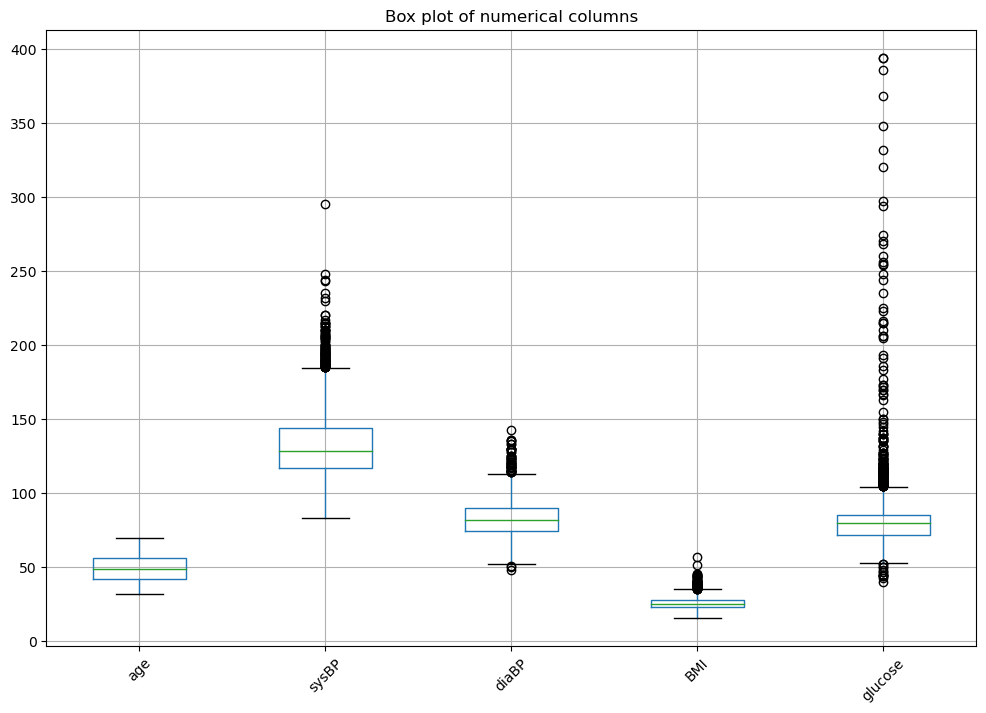

In [34]:
numerical_columns = ['age',  'sysBP', 'diaBP', 'BMI',  'glucose']

# Use box plots to visualize potential outliers
plt.figure(figsize=(12, 8))
df1[numerical_columns].boxplot()
plt.title('Box plot of numerical columns')
plt.xticks(rotation=45)
plt.show()

In [35]:
df1.sample(10)

,age,diabetes,sysBP,diaBP,BMI,glucose,TenYearCHD,is_M,is_smoking_YES
1302,55,0,131.0,87.0,24.68,70.00000,0,0,0
974,42,0,124.0,80.0,21.50,60.00000,0,1,0
445,39,0,112.5,75.0,22.91,82.08652,0,0,1
1574,62,0,135.0,97.5,24.88,96.00000,0,1,0
1660,39,0,114.0,64.0,22.35,82.08652,0,0,1
2185,40,0,124.0,79.0,24.23,81.00000,0,0,1
3045,52,1,130.0,74.0,32.52,248.00000,1,1,0
919,38,0,118.0,77.0,25.87,82.00000,0,1,0
1337,36,0,100.0,64.0,19.87,65.00000,0,0,1
2554,62,0,145.0,82.5,28.27,75.00000,0,0,0


In [36]:
# Outlier treatment using the IQR method
numerical_columns = ['age','diabetes', 'sysBP', 'diaBP', 'BMI', 'glucose']

# Convert the columns to numeric data types
df1[numerical_columns] = df1[numerical_columns].apply(pd.to_numeric, errors='coerce')

for column in numerical_columns:
    # Calculate Q1 and Q3
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier treatment
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap or floor values beyond the specified bounds
    df1[column] = df1[column].apply(lambda x: max(lower_bound, min(upper_bound, x)))


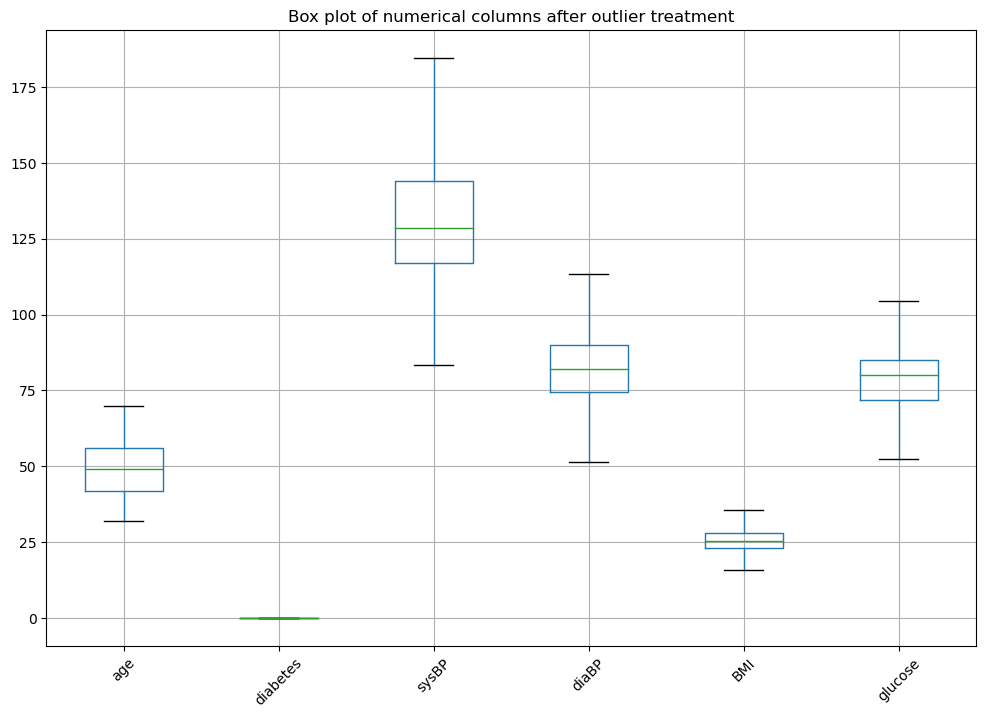

In [37]:
# Check for outliers using box plots
plt.figure(figsize=(12, 8))
df1[numerical_columns].boxplot()
plt.title('Box plot of numerical columns after outlier treatment')
plt.xticks(rotation=45)
plt.show()

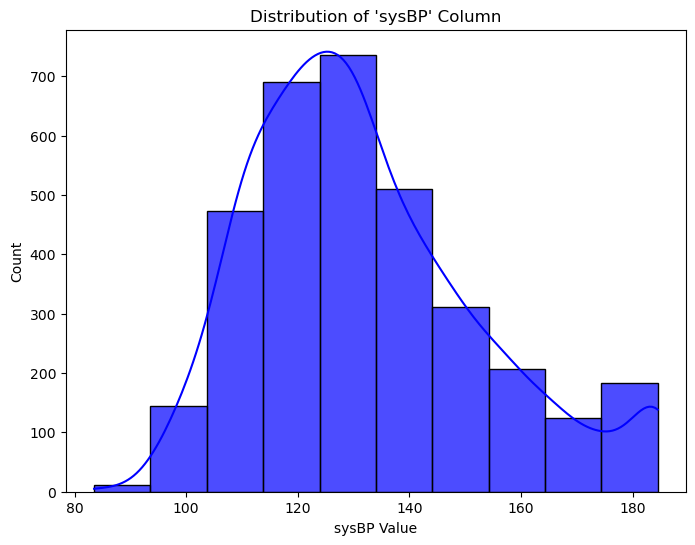

In [38]:
# Plot the distribution of the 'glucose' column using seaborn histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='sysBP', kde=True, bins=10, color='blue', alpha=0.7)
plt.title("Distribution of 'sysBP' Column")
plt.xlabel("sysBP Value")
plt.ylabel("Count")
plt.show()

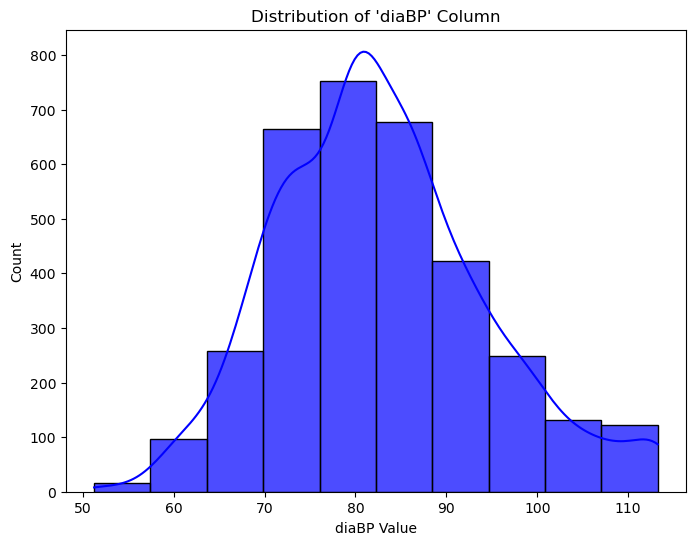

In [39]:
# Plot the distribution of the 'glucose' column using seaborn histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='diaBP', kde=True, bins=10, color='blue', alpha=0.7)
plt.title("Distribution of 'diaBP' Column")
plt.xlabel("diaBP Value")
plt.ylabel("Count")
plt.show()

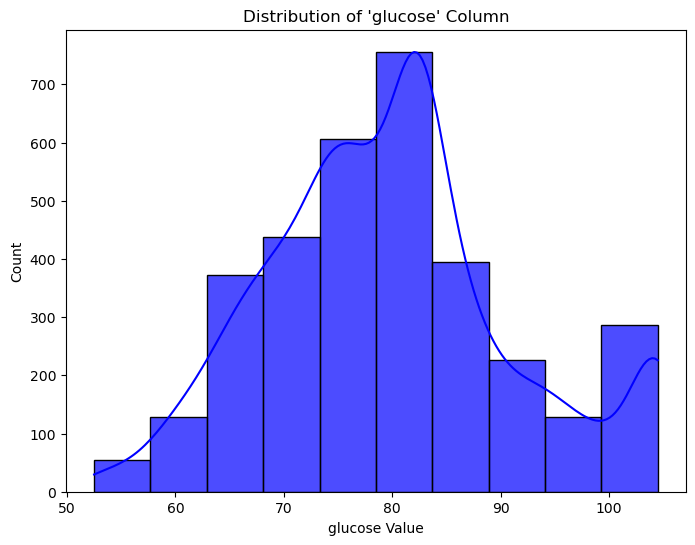

In [40]:
# Plot the distribution of the 'glucose' column using seaborn histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='glucose', kde=True, bins=10, color='blue', alpha=0.7)
plt.title("Distribution of 'glucose' Column")
plt.xlabel("glucose Value")
plt.ylabel("Count")
plt.show()

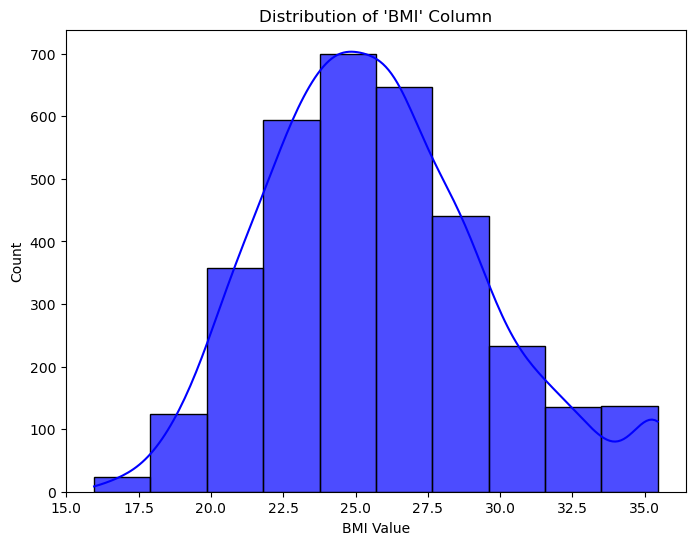

In [41]:
# Plot the distribution of the 'glucose' column using seaborn histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='BMI', kde=True, bins=10, color='blue', alpha=0.7)
plt.title("Distribution of 'BMI' Column")
plt.xlabel("BMI Value")
plt.ylabel("Count")
plt.show()

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df1 is the DataFrame containing your data
numerical_columns = ['sysBP', 'diaBP', 'BMI', 'glucose']

# Convert the columns to numeric data types
df1[numerical_columns] = df1[numerical_columns].apply(pd.to_numeric, errors='coerce')


# Normalize the numerical features using MinMaxScaler
scaler = MinMaxScaler()
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])



In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import pickle

In [44]:
# Split the data into features (X) and the target variable (y)
X = df1.drop('TenYearCHD', axis=1)
y = df1['TenYearCHD']

In [45]:
X

,age,diabetes,sysBP,diaBP,BMI,glucose,is_M,is_smoking_YES
0,64,0.0,0.638614,0.544355,0.504648,0.528846,0,1
1,36,0.0,0.836634,0.754032,0.708614,0.432692,1,0
2,46,0.0,0.321782,0.318548,0.225258,0.798077,0,1
3,50,0.0,0.737624,0.592742,0.631133,0.798077,1,1
4,64,0.0,0.524752,0.544355,0.536720,0.471154,0,1
...,...,...,...,...,...,...,...,...
3385,60,0.0,0.396040,0.447581,0.683471,0.971154,0,0
3386,46,0.0,0.183168,0.076613,0.307870,0.605769,0,0
3387,44,0.0,0.797030,1.000000,0.664999,0.375000,1,1
3388,60,0.0,0.826733,0.866935,0.361747,0.625000,1,0


In [46]:
y

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [48]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=3000, n_classes=2, weights=[1,1], random_state=42,n_features=8)
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=42)

In [49]:

# Create and train the classifier (Logistic Regression as an example) with class weight
CHDmodel = LogisticRegression()
CHDmodel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = CHDmodel.predict(X_test)


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9666666666666667
Confusion Matrix:
[[323  14]
 [  6 257]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       337
           1       0.95      0.98      0.96       263

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

Recall: 0.9771863117870723
Precision: 0.948339483394834


In [51]:
# Save the trained model as a pickle file
with open('CHDmodel.pickle', 'wb') as file:
    pickle.dump(CHDmodel, file)

print("Trained model saved as model.pickle")

Trained model saved as model.pickle


In [52]:
pwd

'C:\\Users\\maqpr\\Documents'